# Birth Rates Analysis
This is from the following tutorial: https://thecleverprogrammer.com/2020/05/08/birth-rate-analysis/

In [4]:
# import pandas so we can start to clean the data set
import pandas as pd
births = pd.read_csv("births.csv") 
print(births.head()) 
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)
births = births.drop(["Unnamed: 5", "Unnamed: 6"], axis=1)

   year  month  day gender  births  Unnamed: 5  Unnamed: 6
0  1969      1  1.0      F    4046         NaN         NaN
1  1969      1  1.0      M    4440         NaN         NaN
2  1969      1  2.0      F    4454         NaN         NaN
3  1969      1  2.0      M    4548         NaN         NaN
4  1969      1  3.0      F    4548         NaN         NaN


In [5]:
# show after cleaning
births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,0,M,183219
15543,2008,11,0,F,158939
15544,2008,11,0,M,165468
15545,2008,12,0,F,173215


In [6]:
# let's do some more data organizing
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

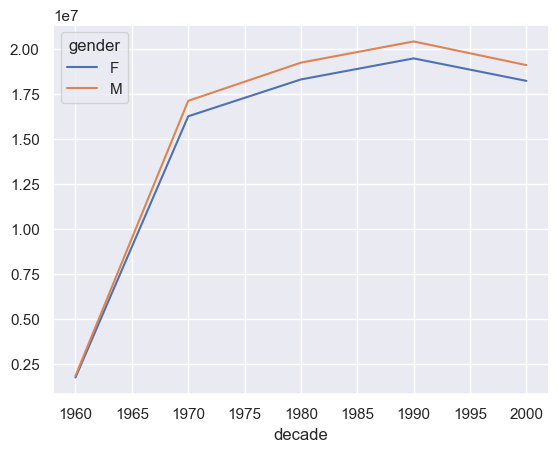

In [7]:
# We immediately see that male births outnumber female births in every decade. 
# To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year :
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel

## Phase 2: More data exploration and cleaning

In [8]:
# cut outliers, we’ll do this via a robust sigma-clipping operation
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [9]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_36967/941237618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)
/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_36967/941237618.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_36967/1761145775.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


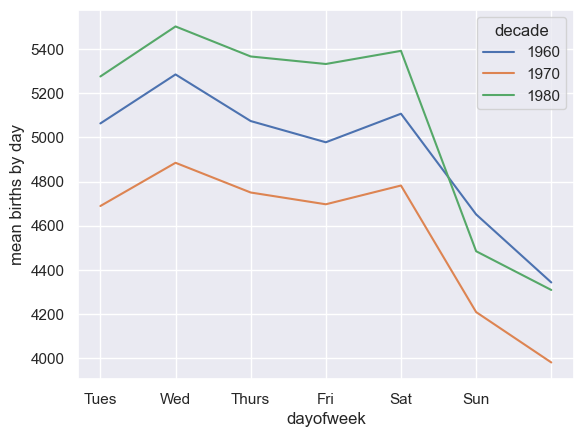

In [10]:
# Using this we can plot births by weekday for several decades:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [11]:
# Another interesting view is to plot the mean number of births by the day of the year. Let’s first group the data by month and day separately:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/var/folders/gr/6ytyl_l54r34xk4zb10_hq680000gn/T/ipykernel_36967/1458354365.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


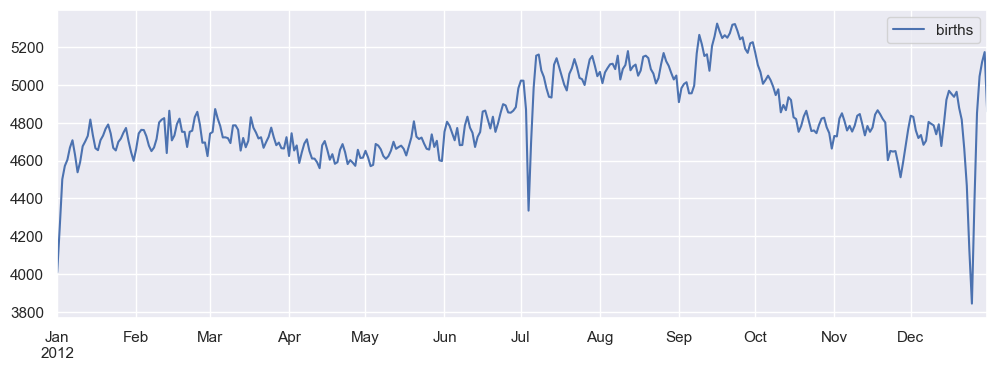

In [12]:
# Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. 
# From this, we can use the plot method to plot the data. It reveals some interesting trends:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()